In [9]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
from utilities import *

pd.options.display.float_format = '{:.3f}'.format

In [10]:
# Define API keys. Available for free upon registering
QUANDL_KEY = open('quandl_API.txt', 'r').readline()
VANTAGE_KEY = open('alpha_vantage_API.txt', 'r').readline()

## Portfolio
All data is made up. Slight inconsistencies might arise from this

In [11]:
pf = Portfolio(bm_key="SNB/CAPCHSTOCKI", 
               bm_series="SPI Swiss Performance Index - Index total (including dividend reinvestment)",
               start_date = "22/11/2013")

pf.pay_in("22/11/2013", 5000)
pf.pay_in("25/11/2013", 1000)
pf.pay_in("24/12/2013", 1000)
pf.pay_in("21/02/2014", 5000)
pf.pay_in("17/03/2014", 5000)
pf.pay_in("16/10/2014", 2000)
pf.pay_in("19/01/2014", 2000)
pf.pay_in("03/09/2015", 5000)
pf.pay_in("11/02/2016", 5000)
pf.pay_in("15/02/2016", 5000)

pf.pf_fee("22/11/2013", -200)
pf.pf_fee("31/12/2013", 25.00)
pf.pf_fee("31/03/2014", 25.00)
pf.pf_fee("30/06/2014", 25.00)
pf.pf_fee("30/09/2014", 25.00)
pf.pf_fee("31/12/2014", 25.00)
pf.pf_fee("31/03/2015", 25.00)
pf.pf_fee("30/06/2015", 25.00)
pf.pf_fee("30/09/2015", 25.00)
pf.pf_fee("31/12/2015", 25.00)
pf.pf_fee("31/03/2016", 25.00)
pf.pf_fee("30/06/2016", 25.00)
pf.pf_fee("30/09/2016", 25.00)
pf.pf_fee("30/12/2016", 25.00)
pf.pf_fee("31/03/2017", 25.00)
pf.pf_fee("30/06/2017", 25.00)
pf.pf_fee("29/09/2017", 25.00)
pf.pf_fee("29/12/2017", 25.00)
pf.pf_fee("30/03/2018", 25.00)

### adding stocks and events
- include "currency" if not denoted in your base currency (as "base into foreign")
  - currencies are only available from quandl, e.g. the BOE dataset has most rates into GBP and USD
- include "old_ticker" if the underlying series changed at some point

In [12]:
CHFUSD = "BOE/XUDLSFD"
CHFEUR = "BOE/XUDLBK68"
NOKUSD = "BOE/XUDLNKD"

UBS = "SIX/CH0244767585CHF"
pf.buy(UBS, "14/04/2014", 75, 17.45, 25, old_ticker="SIX/CH0024899483CHF", display_name="UBS")
pf.buy(UBS, "15/01/2015", 75, 14.73, 25)
pf.dividend_payment(UBS, "11/05/2015", 100)
pf.sell(UBS, "05/08/2015", 150, 22.35, 25)
pf.buy(UBS, "24/08/2015", 100, 19.49, 25)
pf.dividend_payment(UBS, "18/09/2015", 20)
pf.buy(UBS, "03/02/2016", 100, 15.45, 25)
pf.dividend_payment(UBS, "12/05/2016", 200)
pf.dividend_payment(UBS, "08/05/2017", 200)
pf.dividend_payment(UBS, "07/05/2018", 200)

BB_biotech = "SIX/CH0038389992CHF"
pf.buy(BB_biotech, "22/11/2013", 10, 136.80, 25, display_name="BB biotech")
pf.dividend_payment(BB_biotech, "26/03/2014", 70)
pf.sell(BB_biotech, "12/11/2014", 10, 211, 25)
pf.buy(BB_biotech, "25/08/2015", 60, 271, 25)
pf.dividend_payment(BB_biotech, "21/03/2016", 100)
pf.split(BB_biotech, "29/03/2016", 5)
pf.dividend_payment(BB_biotech, "20/03/2017", 50)
pf.dividend_payment(BB_biotech, "15/03/2018", 100)

GM = "GM"
pf.buy(GM, "23-12-2013", 50, 41.40, 25.85, currency=CHFUSD)
pf.dividend_payment(GM, "28/03/2014", 10)
pf.dividend_payment(GM, "26/06/2014", 10)
pf.dividend_payment(GM, "26/09/2014", 10)
pf.dividend_payment(GM, "24/12/2014", 10)
pf.dividend_payment(GM, "25/03/2015", 10)
pf.dividend_payment(GM, "23/06/2015", 10)
pf.dividend_payment(GM, "29/09/2015", 10)
pf.dividend_payment(GM, "29/12/2015", 10)
pf.dividend_payment(GM, "29/03/2016", 10)
pf.dividend_payment(GM, "24/06/2016", 10)
pf.dividend_payment(GM, "23/09/2016", 10)
pf.dividend_payment(GM, "27/12/2016", 10)
pf.dividend_payment(GM, "24/03/2017", 10)
pf.dividend_payment(GM, "23/06/2017", 10)
pf.dividend_payment(GM, "22/09/2017", 10)
pf.sell(GM, "19/09/2017", 50, 38.75, 27.62)

Holcim = "LHN.VX"
pf.buy(Holcim, "07/10/2015", 50, 55.65, 25, display_name="LHN")
pf.buy(Holcim, "15/02/2016", 50, 36.95, 25)
pf.sell(Holcim, "19/04/2016", 50, 50, 25)
pf.dividend_payment(Holcim, "17/05/2016", 70)
pf.dividend_payment(Holcim, "08/05/2017", 100)
pf.dividend_payment(Holcim, "11/05/2018", 100)

SIX/CH0244767585CHF not in portfolio
Bought 75 SIX/CH0244767585CHF
Bought 75 SIX/CH0244767585CHF
Sold 150 SIX/CH0244767585CHF
Bought 100 SIX/CH0244767585CHF
Bought 100 SIX/CH0244767585CHF
SIX/CH0038389992CHF not in portfolio
Bought 10 SIX/CH0038389992CHF
Sold 10 SIX/CH0038389992CHF
Bought 60 SIX/CH0038389992CHF
GM not in portfolio
Bought 50 GM
Sold 50 GM
LHN.VX not in portfolio
Bought 50 LHN.VX
Bought 50 LHN.VX
Sold 50 LHN.VX


### create overview
- IRR: "internal rate of return", the money weighted return if sold today

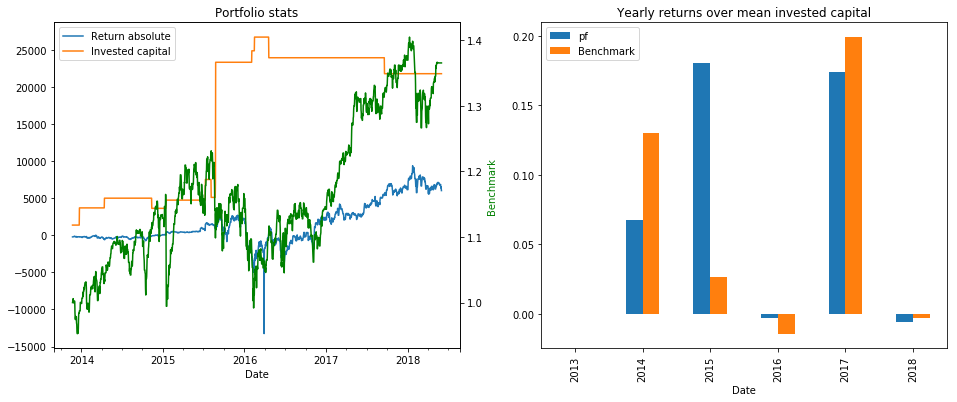

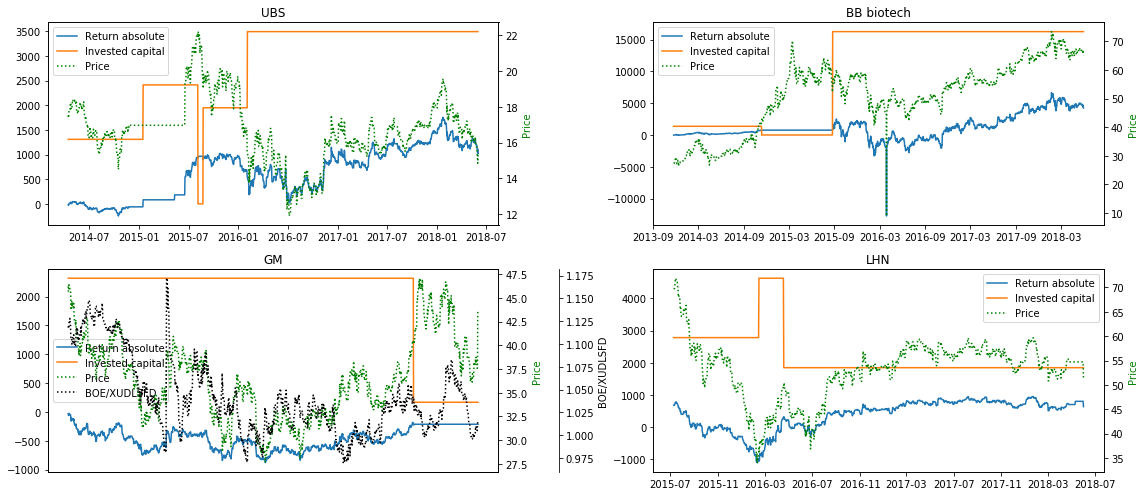

,Currently held,Prev. sold positions,Currently invested capital,Current value,Return absolute,IRR,IRR-BM,Dividends
Portfolio,550.000,300.000,21769.514,26275.765,6017.146,0.072,0.131,1460.000
UBS,200.000,150.000,3494.000,3658.000,1103.000,0.137,nan,720.000
BB biotech,300.000,50.000,16260.000,19760.000,4242.000,0.083,nan,320.000
GM,0.000,50.000,168.014,92.765,-212.854,-0.024,nan,150.000
LHN,50.000,50.000,1847.500,2765.000,635.000,0.083,nan,270.000


PF as of today:


Payments                  36000.000
Fees                        250.000
Cash flow                 16369.146
PF value, selling today   41517.146
dtype: float64

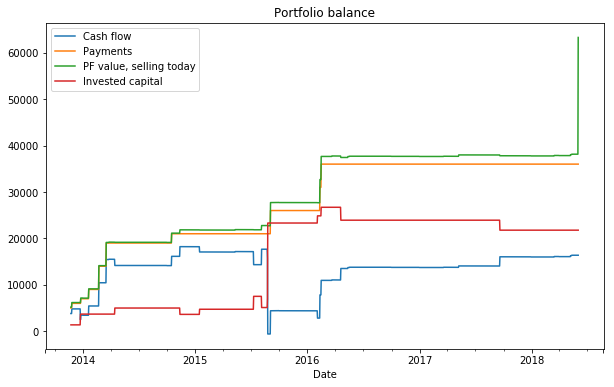

In [13]:
df = pf.create_overview()

### inspecting individually
Useful attributes:
- pf.overview
- pf.balance
- pf.stock_stats
- pf.get_stock(name or ticker).events
- pf.get_stock(name or ticker).stats

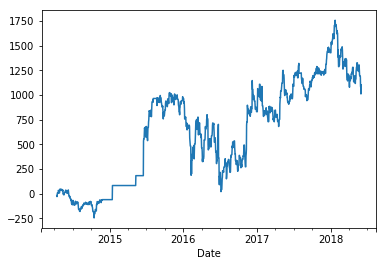

In [14]:
pf.get_stock("UBS").stats["Return absolute"].plot()

In [15]:
pf.stock_stats

,Currently held,Prev. sold positions,Currently invested capital,Current value,Return absolute,IRR,IRR-BM,Dividends
Portfolio,550.000,300.000,21769.514,26275.765,6017.146,0.072,0.131,1460.000
UBS,200.000,150.000,3494.000,3658.000,1103.000,0.137,nan,720.000
BB biotech,300.000,50.000,16260.000,19760.000,4242.000,0.083,nan,320.000
GM,0.000,50.000,168.014,92.765,-212.854,-0.024,nan,150.000
LHN,50.000,50.000,1847.500,2765.000,635.000,0.083,nan,270.000
